# Viz Training Curves

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import json

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

import seaborn as sns

## MoCo Backbone

train

In [2]:
def parse_training_log_type_moco(filepath, title=''):
    # Function to parse training log files of type 'moco'

    epochs = []
    train_loss = []

    with open(filepath, 'r') as f:
        # Read in list of dictionaries from file
        log_data = json.load(f)

    for entry in log_data:
        epochs.append(entry['epoch'])
        train_loss.append(entry['loss'])

    # Create training loss curve plot
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Pre-training Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

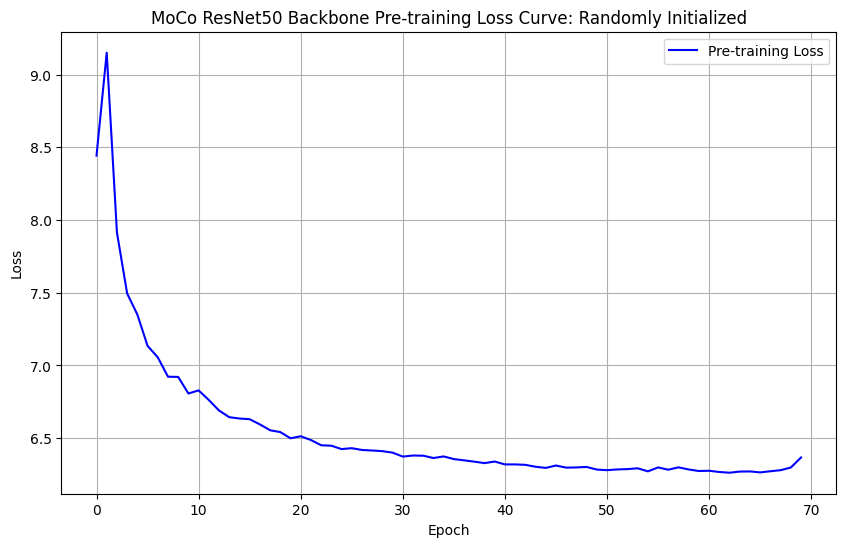

In [17]:
moco_log_train = './pretrain_stats_training.json'
parse_training_log_type_moco(moco_log_train, 'MoCo ResNet50 Backbone Pre-training Loss Curve: Randomly Initialized')

VIT_S_16

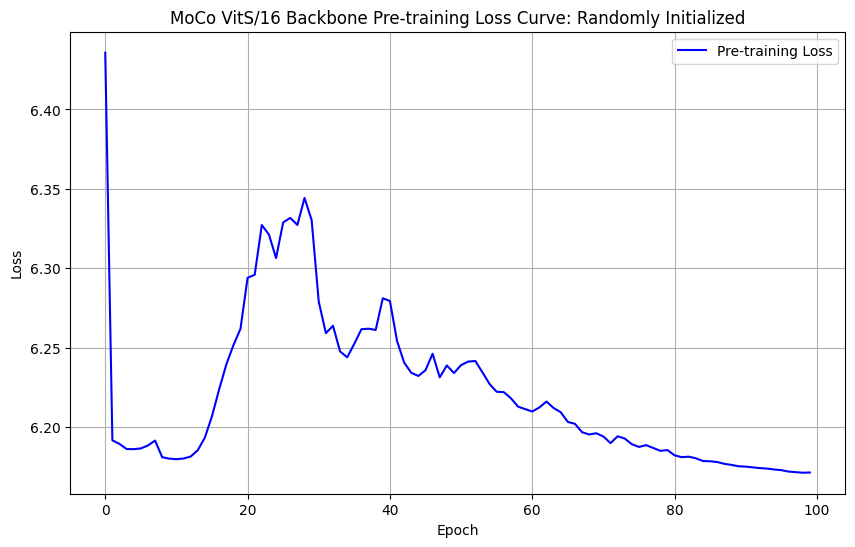

In [3]:
moco_log_train = './vit_s_16_pretrain_stats_training.json'
parse_training_log_type_moco(moco_log_train, 'MoCo VitS/16 Backbone Pre-training Loss Curve: Randomly Initialized')

## Transfer Learning

In [10]:
def load_training_stats_and_plot(filepath, title=''):
    # Function to load training stats and plot training curves

    # Load training stats from pickle file
    with open(filepath, 'rb') as f:
        stats = pickle.load(f)

    epochs = [entry['epoch'] for entry in stats]
    train_loss = [entry['train_loss'] for entry in stats]
    val_loss = [entry['val_loss'] for entry in stats]
    train_acc = [entry['train_acc'] for entry in stats]
    val_acc = [entry['val_acc'] for entry in stats]

    # Plot Loss Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss', color='blue')
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss Curve')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy Curve')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

NIH - Pneuonia Dataset - Binary

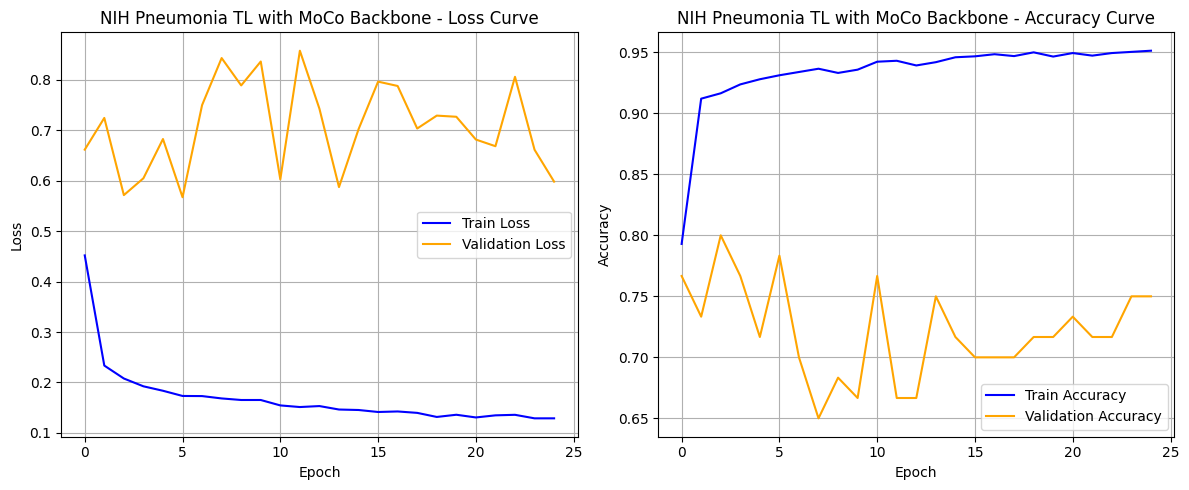

In [13]:
filepath = './nih_binary_finetune_training_stats.pkl'
load_training_stats_and_plot(filepath, title='NIH Pneumonia TL with MoCo Backbone')

Chexpert

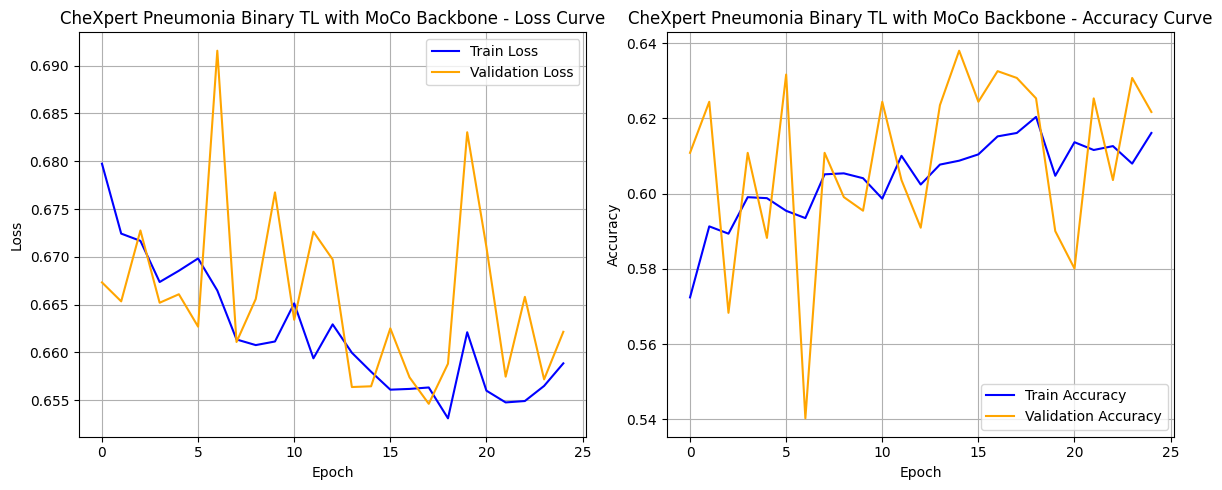

In [14]:
filepath = './chexpert_bin_finetune_training_stats.pkl'
load_training_stats_and_plot(filepath, title='CheXpert Pneumonia Binary TL with MoCo Backbone')

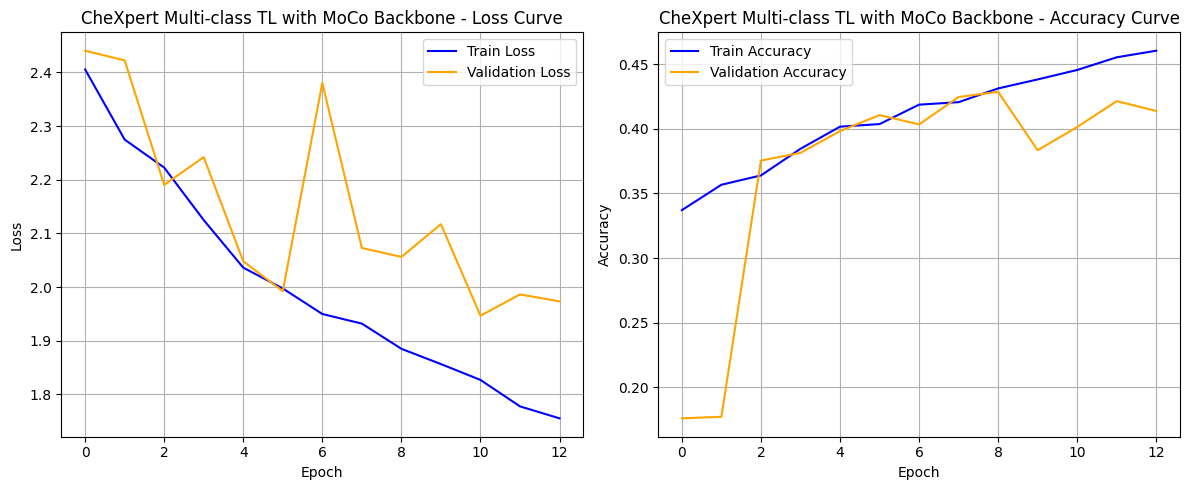

In [15]:
filepath = './chexpert_multi_finetune_training_stats.pkl'
load_training_stats_and_plot(filepath, title='CheXpert Multi-class TL with MoCo Backbone')